In [9]:
import requests
r = requests.get('https://api.github.com/events') # функция get возвращает объект Responce
print(f"Статус ответа: {r}")
print(r.text[0:80])

Статус ответа: <Response [200]>
[{"id":"18581944288","type":"PushEvent","actor":{"id":41898282,"login":"github-a


Мы можем поставить брекпоинт после создания этого объекта (дебаггинг выполняется **до** строчки, на которой стоит брекпоинт) и посмотреть список его атрибутов и методов
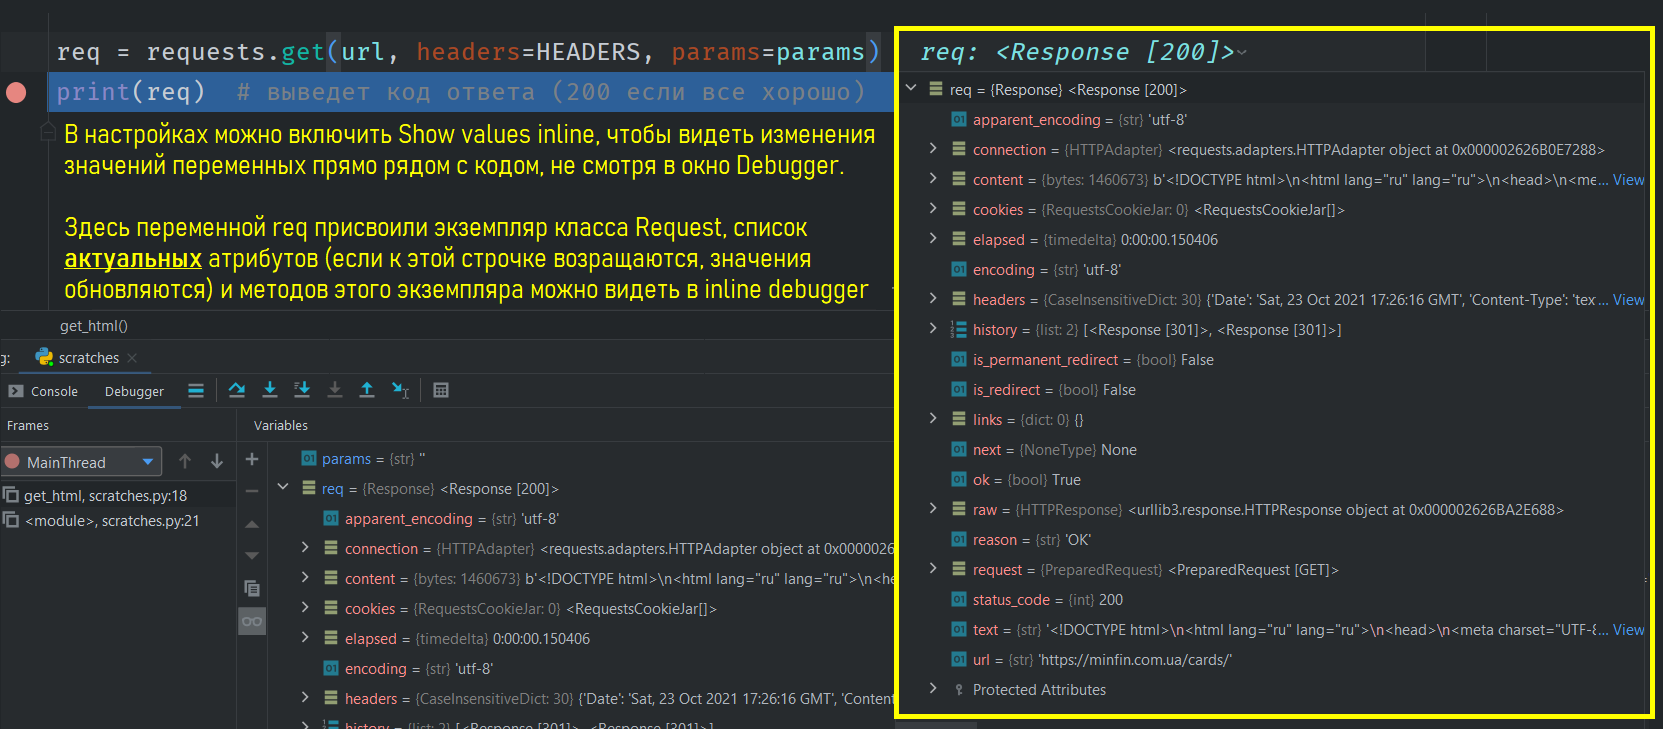

Есть несколько способов проверить, доступен ли сайт. Сравнить его с кодом 200 кажется самым очевидным, но на самом деле сервер может выдать запрашиваемый сайт без ошибок и с другим кодом состояния, например: 
- 206 (Partial Content) сервер вернул часть контента
- 300 (Multiple Choices) по указанному URI существует несколько вариантов предоставления ресурса. Сервер передаёт с сообщением список альтернатив, давая возможность сделать выбор клиенту автоматически или пользователю

и т.п. Все коды от 400 до 500 - это ошибка на стороне клиента, от 500 до 600 - ошибка на стороне сервера.
Чтобы предосмотреть все эти случаи, есть *свойство* (т.е. метод с декоратором @property - доступ к нему чеез интерфейс атрибута) ok, которое == True, если сервер вернул код ответа меньше 400

In [13]:
resp = requests.get("http://httpbin.org/get")
if resp.status_code == 200:  # самый очевидный способ
    print("Ответ 200, ошибок не возникло")  
if resp.ok:
    print("Сервер отдал любой валидный код, ошибок не возникло")

Ответ 200, ошибок не возникло
Сервер отдал любой валидный код, ошибок не возникло


## Заголовки

Чтобы посмотреть список всех заголовков, которые отправляются при запросе на определенный сайт, нужно зайти на сайт, F12 → Network → All, обновить страницу и самым первым в потоке будет каркас страницы (все остальные медаифайлы уже потом), выбрать каркас и перейти во вкладку Headers.
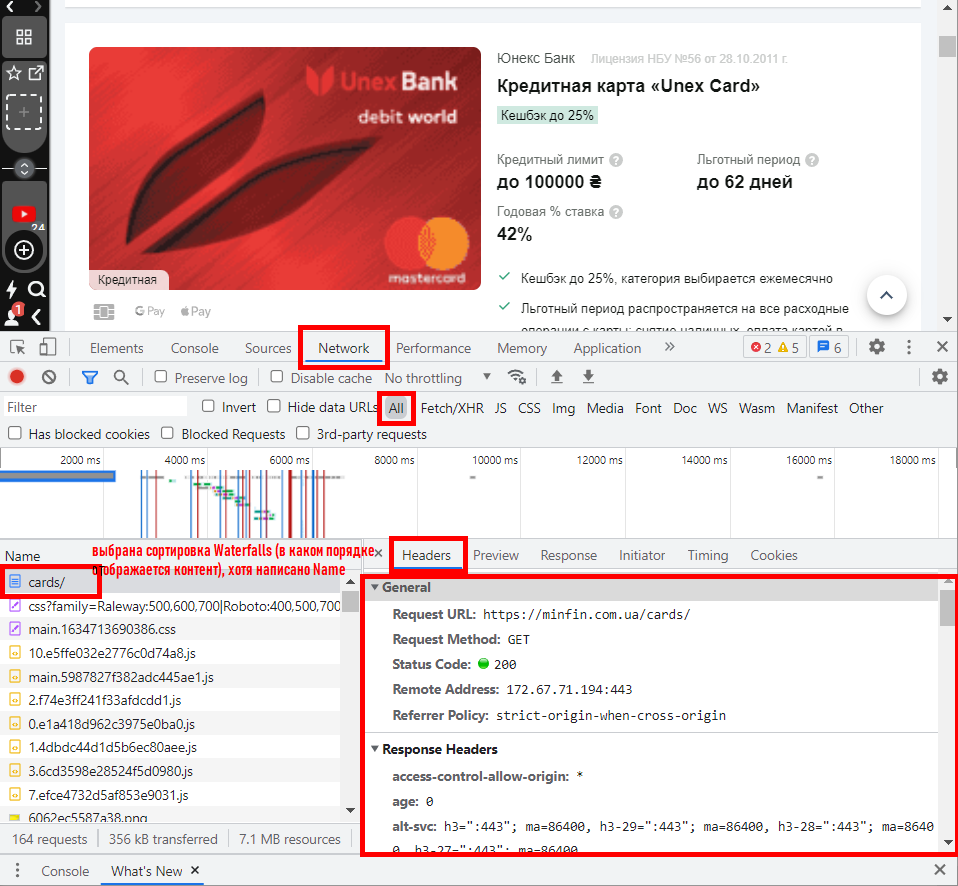

Вот так выполняются POST, PUT, DELETE, HEAD, OPTIONS HTTP запросы:

In [ ]:
r.put('https://httpbin.org/put', data={'key': 'value'}) # в словарь передаются параметры запроса
r.delete('https://httpbin.org/delete')
r.head('https://httpbin.org/get')
r.options('https://httpbin.org/get')